In [1]:
import numpy as np
import healpy as hp
import matplotlib.pylab as plt
%matplotlib inline
from rubin_sim.scheduler.modelObservatory import Model_observatory
from rubin_sim.scheduler.utils import (Footprint, Footprints, Step_slopes,
                                       slice_wfd_area_quad, Sky_area_generator, ra_dec_hp_map)
from baseline import make_rolling_footprints

In [5]:
nside = 32
nslice = 2
scale = 0.9
sm = Sky_area_generator(nside=nside,
                                default_filter_balance={'u': 0.07, 'g': 0.09,
                                                        'r': 0.22, 'i': 0.22,
                                                        'z': 0.20, 'y': 0.20})
sm.set_maps()
final_tot, footprints_hp = sm.return_maps()
# Set the wfd, aka rolling, pixels
wfd_footprint = sm.maps['dustfree']
wfd_indx = np.where(wfd_footprint > 0)[0]

normval = footprints_hp['r'][wfd_indx].min()
for key in footprints_hp:
    footprints_hp[key] = footprints_hp[key]/normval
observatory = Model_observatory(nside=nside)
conditions = observatory.return_conditions()

footprints = make_rolling_footprints(fp_hp=footprints_hp, mjd_start=conditions.mjd_start,
                                     sun_RA_start=conditions.sun_RA_start, nslice=nslice, scale=scale,
                                     nside=nside, wfd_indx=wfd_indx)


In [6]:
footprints

In [17]:
ack = footprints(conditions.mjd_start+365.25*2.5)

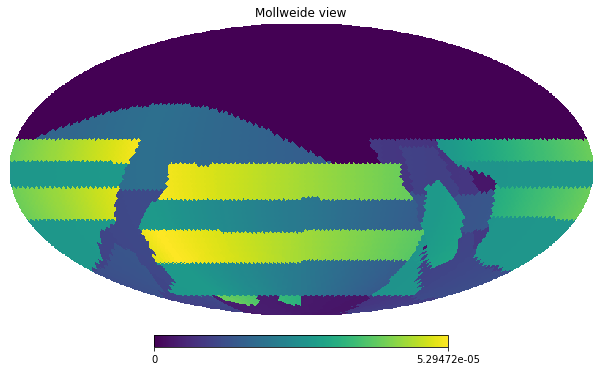

In [18]:
hp.mollview(ack['r'])